In [ ]:
import pandas as pd 
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel('/Datasets/clusteringData.xlsx', sheet_name='X', header=None)
df.head()

,0,1
0,13.046815,14.741152
1,13.408520,13.763270
2,14.195915,15.853181
3,14.914701,16.174260
4,13.576700,14.042849


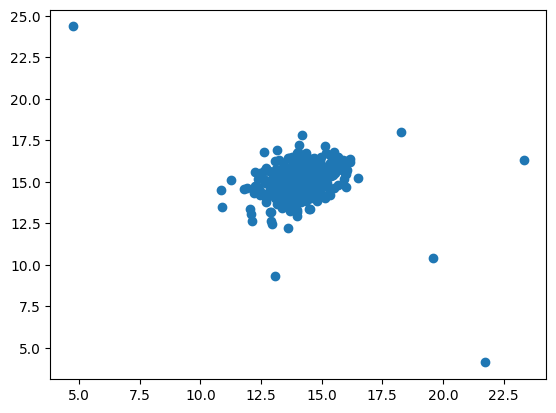

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(df[0], df[1])
plt.show()

In [ ]:
m = len(df)

In [ ]:
def probability(df):
    s = np.sum(df, axis=0)
    m = len(df)
    mu = s/m
    vr = np.sum((df - mu)**2, axis=0)
    variance = vr/m
    var_dia = np.diag(variance)
    k = len(mu)
    X = df - mu
    p = 1/((2*np.pi)**(k/2)*(np.linalg.det(var_dia)**0.5))* np.exp(-0.5* np.sum(X @ np.linalg.pinv(var_dia) * X,axis=1))
    return p

In [ ]:
cvx = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/NNML/clusteringData.xlsx', sheet_name='Xval', header=None)
cvx.head()

,0,1
0,15.790260,14.921024
1,13.639619,15.329955
2,14.865899,16.473865
3,13.584676,13.989306
4,13.464042,15.635330


In [ ]:
cvy = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/NNML/clusteringData.xlsx', sheet_name='y', header=None)
cvy.head()

,0
0,0
1,0
2,0
3,0
4,0


In [ ]:
p1 = probability(cvx)

In [ ]:
y = np.array(cvy)

In [ ]:
p1.describe()

count    3.070000e+02
mean     5.378568e-02
std      1.928081e-02
min      1.800521e-30
25%      4.212979e-02
50%      5.935014e-02
75%      6.924909e-02
max      7.864731e-02
dtype: float64

In [ ]:
def tpfpfn(ep, p):
    tp, fp, fn = 0, 0, 0
    for i in range(len(y)):
        if p1[i] <= ep and y[i][0] == 1:
            tp += 1
        elif p1[i] <= ep and y[i][0] == 0:
            fp += 1
        elif p1[i] > ep and y[i][0] == 1:
            fn += 1
    return tp, fp, fn

In [ ]:
eps = [i for i in p1 if i <= p1.mean()]
len(eps)

128

In [ ]:
def f1(ep, p):
  tp, fp, fn = tpfpfn(ep,p)
  prec = tp/(tp + fp)
  rec = tp/(tp + fn)
  f1 = 2*prec*rec/(prec + rec)
  return f1

In [ ]:
f = []
for i in eps:
  x = f1(i,p1)
  f.append(x)

In [ ]:
np.array(f).argmax()

127

In [ ]:
e = eps[127]
e

0.00014529639061630243

In [ ]:
label = []
for i in range(len(df)):
    if p[i] <= e:
        label.append(1)
    else:
        label.append(0)

In [ ]:
df['label'] = np.array(label)
df.head()

,0,1,label
0,13.046815,14.741152,0
1,13.408520,13.763270,0
2,14.195915,15.853181,0
3,14.914701,16.174260,0
4,13.576700,14.042849,0


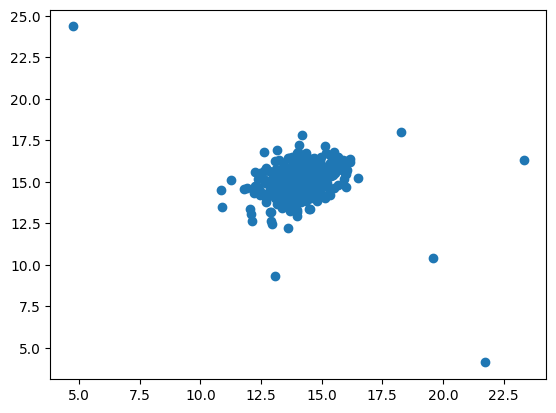

In [ ]:
plt.figure()
plt.scatter(df[0], df[1])
plt.show()